## **MSc Major Research Project**
## **Exploring the effect of daytime physical activity on sleep quality**
Melania Czobit

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Flatten, LSTM, GRU
from tensorflow.keras.layers import Activation, Dropout, Dense

from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/MRP/FitbitClean.csv'
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,...,weekday,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency,class
0,2015-08-01,67918.0,97.0,80.455666,14.178942,11419.0,10.0,637.0,217.0,30.0,...,5,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
1,2015-08-02,67918.0,59.0,93.715698,10.107015,9042.0,10.0,1174.0,234.0,26.0,...,6,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
2,2015-08-03,67918.0,97.0,77.604469,12.975431,6327.0,6.0,673.0,175.0,7.0,...,0,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
3,2015-08-04,67918.0,59.0,90.791718,13.081469,13092.0,18.0,1118.0,205.0,35.0,...,1,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
4,2015-08-05,67918.0,100.0,79.504982,14.706803,12689.0,47.0,563.0,261.0,15.0,...,2,23:13:00,9:00:00,588.0,2.0,0.0,547.0,39.0,0.933447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,2016-07-28,36501.0,98.0,50.556137,13.650418,5965.0,6.0,647.0,183.0,26.0,...,3,23:31:30,9:26:30,596.0,0.0,0.0,538.0,58.0,0.902685,5
45871,2016-07-29,36501.0,97.0,52.905212,13.897326,8814.0,34.0,586.0,244.0,18.0,...,4,0:54:00,10:27:00,574.0,1.0,0.0,553.0,20.0,0.965096,5
45872,2016-07-30,36501.0,96.0,49.838959,8.438036,4890.0,11.0,698.0,248.0,4.0,...,5,2:15:30,10:19:30,485.0,5.0,0.0,449.0,31.0,0.935417,5
45873,2016-07-31,36501.0,93.0,52.419224,15.835029,10229.0,7.0,618.0,225.0,14.0,...,6,1:58:30,9:54:30,477.0,20.0,0.0,434.0,23.0,0.949672,5


In [ ]:
df2 = df.drop(['timetobed','timeoutofbed','bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake'],axis=1)
df2 = df2.sort_values(['date', 'egoid'])
df2 = df2.reset_index(drop=True)
df2.head()

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class
0,2015-08-01,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,5,0.947166,5
1,2015-08-01,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,5,0.932055,5
2,2015-08-01,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,5,0.923074,5
3,2015-08-01,14571.0,100.000000,79.816910,16.561857,15706.000000,25.000000,623.000000,218.000000,57.000000,42.000000,1221.000000,205.000000,5.000000,0.000000,8,5,0.928382,5
4,2015-08-01,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,5,0.923211,5


In [ ]:
df_LSTM = df2.copy()
df_LSTM['Last_day_sleep'] = df_LSTM.groupby(['egoid'])['Efficiency'].shift()
df_LSTM['Last_day_Diff'] = df_LSTM.groupby(['egoid'])['Efficiency'].diff()
df_LSTM = df_LSTM.dropna()
df_LSTM

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,...,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class,Last_day_sleep,Last_day_Diff
125,2015-08-02,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,...,1105.151099,247.802198,4.189560,0.390110,8,6,0.947166,5,0.947166,0.000000
126,2015-08-02,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,...,1176.742297,138.792717,4.691877,0.352941,8,6,0.932055,5,0.932055,0.000000
127,2015-08-02,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,...,1206.195531,152.513966,3.611732,0.885475,8,6,0.923074,5,0.923074,0.000000
128,2015-08-02,14571.0,97.000000,79.235764,14.431746,11223.000000,13.000000,688.000000,233.000000,16.000000,...,1266.000000,104.000000,0.000000,0.000000,8,6,0.870044,5,0.928382,-0.058338
129,2015-08-02,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,...,1253.980114,101.613636,1.241477,0.332386,8,6,0.923211,5,0.923211,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,2016-08-01,98117.0,100.000000,72.961700,8.491393,1851.000000,0.000000,858.000000,102.000000,0.000000,...,1434.000000,2.000000,0.000000,0.000000,8,0,0.918410,5,0.989960,-0.071550
45871,2016-08-01,98462.0,71.000000,64.403130,9.968408,6815.000000,13.000000,847.000000,183.000000,3.000000,...,1015.000000,7.000000,0.000000,0.000000,8,0,0.957187,5,0.915371,0.041815
45872,2016-08-01,98760.0,100.000000,54.470375,13.362697,7655.000000,5.000000,663.000000,158.000000,11.000000,...,1357.000000,26.000000,1.000000,0.000000,8,0,0.908932,5,0.881579,0.027353
45873,2016-08-01,98766.0,74.000000,63.618359,10.924669,12064.000000,18.000000,822.000000,164.000000,10.000000,...,1018.000000,17.000000,0.000000,0.000000,8,0,0.929062,5,0.968460,-0.039398


In [ ]:
df_T1 = df_LSTM.copy()
df_T1 = df_T1.set_index('date')
df_T1

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class,Last_day_sleep,Last_day_Diff
date,,,,,,,,,,,,,,,,,,,,
2015-08-02,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,6,0.947166,5,0.947166,0.000000
2015-08-02,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,6,0.932055,5,0.932055,0.000000
2015-08-02,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,6,0.923074,5,0.923074,0.000000
2015-08-02,14571.0,97.000000,79.235764,14.431746,11223.000000,13.000000,688.000000,233.000000,16.000000,12.000000,1266.000000,104.000000,0.000000,0.000000,8,6,0.870044,5,0.928382,-0.058338
2015-08-02,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,6,0.923211,5,0.923211,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-01,98117.0,100.000000,72.961700,8.491393,1851.000000,0.000000,858.000000,102.000000,0.000000,0.000000,1434.000000,2.000000,0.000000,0.000000,8,0,0.918410,5,0.989960,-0.071550
2016-08-01,98462.0,71.000000,64.403130,9.968408,6815.000000,13.000000,847.000000,183.000000,3.000000,15.000000,1015.000000,7.000000,0.000000,0.000000,8,0,0.957187,5,0.915371,0.041815
2016-08-01,98760.0,100.000000,54.470375,13.362697,7655.000000,5.000000,663.000000,158.000000,11.000000,35.000000,1357.000000,26.000000,1.000000,0.000000,8,0,0.908932,5,0.881579,0.027353


In [ ]:
df_T1['egoid'] = df_T1['egoid'].astype('object')
df_T1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45750 entries, 2015-08-02 to 2016-08-01
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   egoid                 45750 non-null  object 
 1   complypercent         45750 non-null  float64
 2   meanrate              45750 non-null  float64
 3   sdrate                45750 non-null  float64
 4   steps                 45750 non-null  float64
 5   floors                45750 non-null  float64
 6   sedentaryminutes      45750 non-null  float64
 7   lightlyactiveminutes  45750 non-null  float64
 8   fairlyactiveminutes   45750 non-null  float64
 9   veryactiveminutes     45750 non-null  float64
 10  lowrangemins          45750 non-null  float64
 11  fatburnmins           45750 non-null  float64
 12  cardiomins            45750 non-null  float64
 13  peakmins              45750 non-null  float64
 14  month                 45750 non-null  int64  
 15  weekday   

### Simple LSTM

In [ ]:
# Simple LSTM
X = df_T1.drop(['Efficiency','class'], axis=1) 
y = df_T1['Efficiency']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# samples, timesteps, features
X = np.array(X).reshape(X.shape[0], 1, X.shape[1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1) 


model = Sequential()
# model.add(LSTM(64, activation='relu', input_shape=(1, 3))) # return_sequences = True
model.add(LSTM(64, activation='relu', input_shape=(1, 18)))
model.add(Dropout(0.40))
# model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(Dropout(0.20))
model.add(Dense(1))
# # model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test)) # validation_split=0.2 # shuffle=False
y_pred = model.predict(X_test)


## Evaluate
mae_value = metrics.mean_absolute_error(y_test, y_pred)
mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_value = metrics.mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mae_value)
print('Mean Absolute Percentage Error: ', mape_value)
print('Mean Square Error: ', mse_value)
print('Root Mean Square Error: ', rmse_value)

Epoch 1/10
1144/1144 [==============================] - 8s 5ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/10
1144/1144 [==============================] - 5s 4ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/10
1144/1144 [==============================] - 5s 4ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 4/10
1144/1144 [==============================] - 5s 5ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/10
1144/1144 [==============================] - 5s 5ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/10
1144/1144 [==============================] - 5s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/10
1144/1144 [==============================] - 5s 4ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 7.5345e-04 - val_mse: 7.5345e-04
Epoch 8/10
1144/1144 [==============================] 

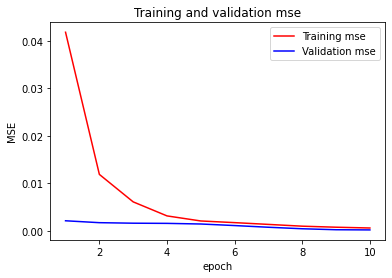

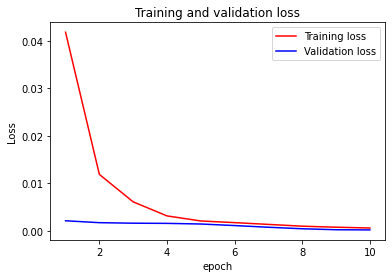

In [ ]:
# Plot
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(mse) + 1)
 
plt.plot(epochs, mse, 'r', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X = df_T1.drop(['class','Efficiency'], axis=1) 
y = df_T1['Efficiency']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = np.array(X).reshape(X.shape[0], 1, X.shape[1])

rmse = []
mae = []
mape = []
train = pd.DataFrame()
val = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=5)
i=1
for train_index, test_index in tscv.split(X):

  X_train = X[train_index]
  X_train = X_train.reshape(X_train.shape[0], 1, 18)
  X_test = X[test_index]
  X_test = X_test.reshape(X_test.shape[0],1,18)
  y_train = y[train_index]
  y_test = y[test_index]

  model = Sequential()
  model.add(LSTM(64, activation='relu', input_shape=(1, 18)))
  model.add(Dropout(0.40))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mse'])
  history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test,y_test)) # validation_split=0.2 # shuffle=False
  y_pred = model.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmse.append(rmse_value)
  mae_value = metrics.mean_absolute_error(y_test, y_pred)
  mae.append(mae_value)
  mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  mape.append(mape_value)
  train[str(i)] = history.history['loss']
  val[str(i)] = history.history['val_loss']
  i += 1
print("Average MAE value: ", sum(mae)/len(mae))
print("Average MAPE value: ", sum(mape)/len(mape))
print("Average RMSE value: ", sum(rmse)/len(rmse))

Epoch 1/15
239/239 [==============================] - 5s 10ms/step - loss: 0.1117 - mse: 0.1117 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2/15
239/239 [==============================] - 2s 8ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 3/15
239/239 [==============================] - 2s 7ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/15
239/239 [==============================] - 2s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/15
239/239 [==============================] - 2s 9ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 6/15
239/239 [==============================] - 1s 5ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/15
239/239 [==============================] - 1s 6ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 8/15
239/239 [==============================] - 1s 5ms/step - loss: 0

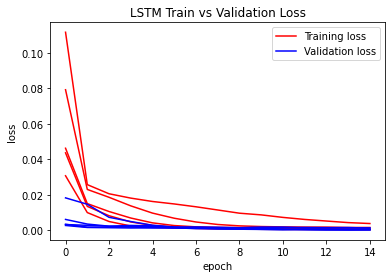

In [ ]:
plt.plot(train, color='red', label='Training loss')
plt.plot(val, color='blue', label='Validation loss')
plt.title('LSTM Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')

plt.show()

### Stacked LSTM

In [ ]:
X = df_T1.drop(['Efficiency','class'], axis=1) 
y = df_T1['Efficiency']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X = np.array(X).reshape(X.shape[0], 1, X.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1) 

model2 = Sequential()
model2.add(LSTM(128, activation='relu', input_shape=(1, 18), return_sequences = True))
model2.add(Dropout(0.40))
model2.add(LSTM(64, activation='relu', return_sequences = True))
model2.add(Dropout(0.40))
model2.add(LSTM(32, activation = 'relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')
history_s = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))
y_pred = model2.predict(X_test)

mae_value = metrics.mean_absolute_error(y_test, y_pred)
mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_value = metrics.mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mae_value)
print('Mean Absolute Percentage Error: ', mape_value)
print('Mean Square Error: ', mse_value)
print('Root Mean Square Error: ', rmse_value)

Epoch 1/10
1144/1144 [==============================] - 15s 9ms/step - loss: 0.0332 - val_loss: 0.0031
Epoch 2/10
1144/1144 [==============================] - 10s 9ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 3/10
1144/1144 [==============================] - 10s 8ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 4/10
1144/1144 [==============================] - 9s 8ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/10
1144/1144 [==============================] - 11s 9ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/10
1144/1144 [==============================] - 9s 8ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/10
1144/1144 [==============================] - 9s 8ms/step - loss: 0.0012 - val_loss: 9.4746e-04
Epoch 8/10
1144/1144 [==============================] - 9s 8ms/step - loss: 9.5830e-04 - val_loss: 7.4191e-04
Epoch 9/10
1144/1144 [==============================] - 10s 8ms/step - loss: 7.5789e-04 - val_loss: 7.4206e-04
Epoch 10/10
1144/1144 [==============================] - 

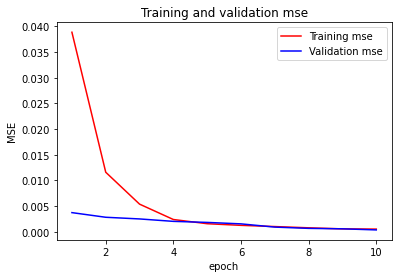

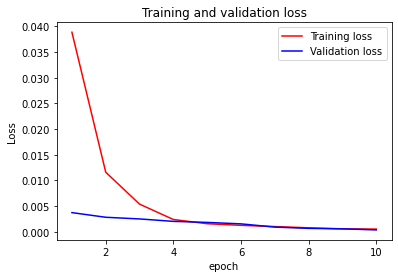

In [ ]:
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(mse) + 1)
 
plt.plot(epochs, mse, 'r', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# stacked LSTM
X = df_T1.drop(['class', 'Efficiency'], axis=1) 
y = df_T1['Efficiency']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = np.array(X).reshape(X.shape[0], 1, X.shape[1])

rmse = []
mae = []
mape = []
train = pd.DataFrame()
val = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=5)
i=1
for train_index, test_index in tscv.split(X):

  X_train = X[train_index]
  X_train = X_train.reshape(X_train.shape[0], 1, 18)
  X_test = X[test_index]
  X_test = X_test.reshape(X_test.shape[0],1,18)
  y_train = y[train_index]
  y_test = y[test_index]

  model2 = Sequential()
  model2.add(LSTM(128, activation='relu', input_shape=(1, 18), return_sequences = True))
  model2.add(Dropout(0.40))
  model2.add(LSTM(64, activation='relu', return_sequences = True))
  model2.add(Dropout(0.40))
  model2.add(LSTM(32, activation = 'relu'))
  model2.add(Dense(1))
  # model.summary()
  model2.compile(optimizer='adam', loss='mean_squared_error')
  history_s = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))
  y_pred = model2.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmse.append(rmse_value)
  mae_value = metrics.mean_absolute_error(y_test, y_pred)
  mae.append(mae_value)
  mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  mape.append(mape_value)

  train[str(i)] = history_s.history['loss']
  val[str(i)] = history_s.history['val_loss']
  i += 1
print("Average MAE value: ", sum(mae)/len(mae))
print("Average MAPE value: ", sum(mape)/len(mape))
print("Average RMSE value: ", sum(rmse)/len(rmse))

Epoch 1/10
239/239 [==============================] - 9s 12ms/step - loss: 0.1311 - val_loss: 0.0034
Epoch 2/10
239/239 [==============================] - 2s 10ms/step - loss: 0.0094 - val_loss: 0.0024
Epoch 3/10
239/239 [==============================] - 2s 9ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 4/10
239/239 [==============================] - 2s 9ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 5/10
239/239 [==============================] - 2s 9ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 6/10
239/239 [==============================] - 2s 10ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 7/10
239/239 [==============================] - 2s 10ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 8/10
239/239 [==============================] - 2s 10ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 9/10
239/239 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 10/10
239/239 [==============================] - 2s 9ms/step - loss: 0.0022 - val_loss: 0

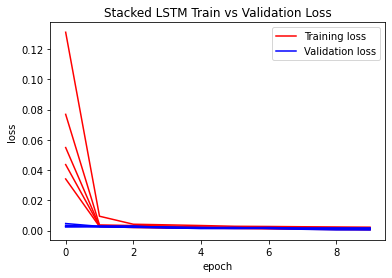

In [ ]:
plt.plot(train, color='red', label='Training loss')
plt.plot(val, color='blue', label='Validation loss')
plt.title('Stacked LSTM Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')

plt.show()

### Bidirectional LSTM

In [ ]:
# Bi-LSTM
train = df_T1.iloc[:-9150,:]
train['egoid'] = train['egoid'].astype('object')
test = df_T1.iloc[-9150:,:]

X_train = train.drop(['class','Efficiency'], axis=1) 
X_test = test.drop(['class','Efficiency'], axis=1)
y_train = train['Efficiency'] 
y_test = test['Efficiency']

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


X_train = np.array(X_train).reshape(train.shape[0], 1, 18)
X_test = np.array(X_test).reshape(test.shape[0], 1, 18)

rmse = []
model3 = Sequential()
model3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(1,18)))
model3.add(Dropout(0.50))
model3.add(Bidirectional(LSTM(32)))
# model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.50))
model3.add(Dense(1))
# # model.summary()
model3.compile(optimizer='adam', loss='mse',  metrics=['mse'])
history_b = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
y_pred = model3.predict(X_test)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse.append(rmse_value)

print('RMSE: ', rmse)
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
1144/1144 [==============================] - 21s 10ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2/10
1144/1144 [==============================] - 10s 9ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3/10
1144/1144 [==============================] - 10s 8ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/10
1144/1144 [==============================] - 10s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 5/10
1144/1144 [==============================] - 9s 8ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/10
1144/1144 [==============================] - 10s 8ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 7/10
1144/1144 [==============================] - 10s 9ms/step - loss: 7.1994e-04 - mse: 7.1994e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8/10
1144/1144 [=========================

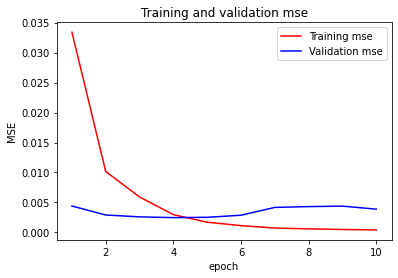

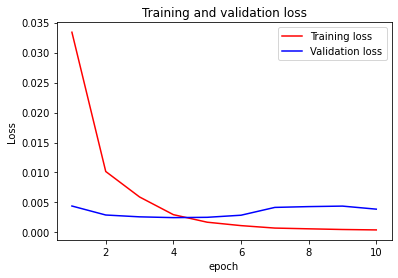

In [ ]:
mse = history_b.history['mse']
val_mse = history_b.history['val_mse']
loss = history_b.history['loss']
val_loss = history_b.history['val_loss']
 
epochs = range(1, len(mse) + 1)
 
plt.plot(epochs, mse, 'r', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X = df_T1.drop(['class', 'Efficiency'], axis=1) 
y = df_T1['Efficiency']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# X = np.array(X).reshape(X.shape[0], 1, X.shape[1])


rmse = []
mae = []
mape = []
train_b = pd.DataFrame()
val_b = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=5)
i=1
for train_index, test_index in tscv.split(X):

  X_train = X[train_index]
  X_train = X_train.reshape(X_train.shape[0], 1, 18)
  X_test = X[test_index]
  X_test = X_test.reshape(X_test.shape[0],1,18)
  y_train = y[train_index]
  y_test = y[test_index]

  model3 = Sequential()
  model3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(1,18)))
  model3.add(Dropout(0.50))
  model3.add(Bidirectional(LSTM(32)))
  # model3.add(Dense(32, activation='relu'))
  model3.add(Dropout(0.50))
  model3.add(Dense(1))
  model3.compile(optimizer='adam', loss='mse',  metrics=['mse'])
  history_b = model3.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test)) #batch_size=32, 
  y_pred = model2.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmse.append(rmse_value)
  mae_value = metrics.mean_absolute_error(y_test, y_pred)
  mae.append(mae_value)
  mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  mape.append(mape_value)

  train_b[str(i)] = history_b.history['loss']
  val_b[str(i)] = history_b.history['val_loss']
  i += 1
print("Average MAE value: ", sum(mae)/len(mae))
print("Average MAPE value: ", sum(mape)/len(mape))
print("Average RMSE value: ", sum(rmse)/len(rmse))

Epoch 1/15
239/239 [==============================] - 11s 14ms/step - loss: 0.0926 - mse: 0.0926 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2/15
239/239 [==============================] - 2s 10ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3/15
239/239 [==============================] - 2s 9ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/15
239/239 [==============================] - 4s 18ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/15
239/239 [==============================] - 2s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 6/15
239/239 [==============================] - 2s 9ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/15
239/239 [==============================] - 2s 10ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 8/15
239/239 [==============================] - 2s 9ms/step - los

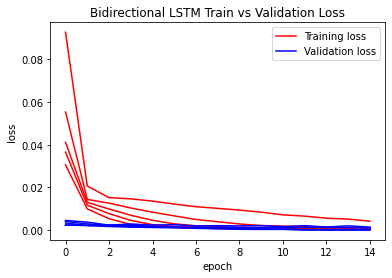

In [ ]:
plt.plot(train_b, color='red', label='Training loss')
plt.plot(val_b, color='blue', label='Validation loss')
plt.title('Bidirectional LSTM Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')

plt.show()

### **Classification**

In [ ]:
df_LSTM2 = df2.copy()
df_LSTM2['Last_day_class'] = df_LSTM2.groupby(['egoid'])['class'].shift()

df_LSTM2['Last_day_class'] = df_LSTM2['Last_day_class'].astype('category')
df_LSTM2 = df_LSTM2.dropna()

df_T2 = df_LSTM2
df_T2 = df_T2.set_index('date')
df_T2

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class,Last_day_class
date,,,,,,,,,,,,,,,,,,,
2015-08-02,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,6,0.947166,5,5.0
2015-08-02,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,6,0.932055,5,5.0
2015-08-02,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,6,0.923074,5,5.0
2015-08-02,14571.0,97.000000,79.235764,14.431746,11223.000000,13.000000,688.000000,233.000000,16.000000,12.000000,1266.000000,104.000000,0.000000,0.000000,8,6,0.870044,5,5.0
2015-08-02,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,6,0.923211,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-01,98117.0,100.000000,72.961700,8.491393,1851.000000,0.000000,858.000000,102.000000,0.000000,0.000000,1434.000000,2.000000,0.000000,0.000000,8,0,0.918410,5,5.0
2016-08-01,98462.0,71.000000,64.403130,9.968408,6815.000000,13.000000,847.000000,183.000000,3.000000,15.000000,1015.000000,7.000000,0.000000,0.000000,8,0,0.957187,5,5.0
2016-08-01,98760.0,100.000000,54.470375,13.362697,7655.000000,5.000000,663.000000,158.000000,11.000000,35.000000,1357.000000,26.000000,1.000000,0.000000,8,0,0.908932,5,5.0


In [ ]:
df_T2['class'] = df_T2['class'].astype('category')
df_T2['egoid'] = df_T2['egoid'].astype('object')

In [ ]:
train = df_T2.iloc[:-9150,:]
test = df_T2.iloc[-9150:,:]

X_train = train.drop(['Efficiency','class','Last_day_class'], axis=1) 
X_test = test.drop(['Efficiency','class','Last_day_class'], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


X_train = np.array(X_train).reshape(train.shape[0], 1, 16)
X_test = np.array(X_test).reshape(test.shape[0], 1, 16)

y_train = np.array(pd.get_dummies(train['class']))
y_test = np.array(pd.get_dummies(test['class']))

model3 = Sequential()
model3.add(LSTM(32, activation='relu', input_shape=(1,16)))
model3.add(Dropout(0.40))
model3.add(Dense(32, activation='relu'))
# model3.add(Dropout(0.40))
model3.add(Dense(5, activation='softmax'))
# # model.summary()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
y_pred = model3.predict(X_test)
print('Accuracy: ', accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

Epoch 1/10
1144/1144 [==============================] - 7s 4ms/step - loss: 0.1235 - accuracy: 0.9889 - val_loss: 0.1166 - val_accuracy: 0.9813
Epoch 2/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0720 - accuracy: 0.9890 - val_loss: 0.1150 - val_accuracy: 0.9813
Epoch 3/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0701 - accuracy: 0.9890 - val_loss: 0.1158 - val_accuracy: 0.9813
Epoch 4/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0687 - accuracy: 0.9890 - val_loss: 0.1166 - val_accuracy: 0.9813
Epoch 5/10
1144/1144 [==============================] - 4s 3ms/step - loss: 0.0675 - accuracy: 0.9890 - val_loss: 0.1195 - val_accuracy: 0.9813
Epoch 6/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0671 - accuracy: 0.9890 - val_loss: 0.1169 - val_accuracy: 0.9813
Epoch 7/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0665 - accuracy: 0.9890 - val_loss: 0.1207 - val_accuracy: